In [2]:
import pandas as pd
import numpy as np

# Установим параметры
np.random.seed(42)
months = ["Январь", "Февраль", "Март", "Апрель", "Май", "Июнь", "Июль", "Август", "Сентябрь", "Октябрь", "Ноябрь", "Декабрь"]
sources = [
    "Отопление жилых домов",
    "Транспорт",
    "Промышленные объекты",
    "ТЭЦ",
    "Переносимая ветром пыль",
    "Мусорные полигоны",
    "Городская пыль"
]

# Сезонные влияния
seasonal_factors = {
    "Отопление жилых домов": [40, 30, 20, 10, 0, 0, 0, 0, 10, 20, 30, 40],
    "Транспорт": [25, 25, 25, 25, 30, 35, 35, 35, 30, 25, 25, 25],
    "Промышленные объекты": [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
    "ТЭЦ": [15, 15, 10, 5, 0, 0, 0, 0, 5, 10, 15, 15],
    "Переносимая ветром пыль": [10, 10, 15, 20, 30, 35, 40, 40, 35, 20, 15, 10],
    "Мусорные полигоны": [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
    "Городская пыль": [5, 5, 5, 5, 5, 5, 10, 10, 10, 5, 5, 5]
}

# Генерация данных
data = []
years = [2023, 2024, 2025, 2026]  # Добавлены годы

for year in years:
    for month_idx, month in enumerate(months):
        for source in sources:
            contribution = seasonal_factors[source][month_idx]
            pm25 = contribution * np.random.uniform(0.8, 1.2)  # Добавляем разброс
            temperature = np.random.uniform(-10, 5) if month_idx < 3 or month_idx > 10 else np.random.uniform(10, 35)
            wind_speed = np.random.uniform(0.5, 5) if month_idx < 3 or month_idx > 10 else np.random.uniform(1, 10)
            humidity = np.random.uniform(30, 70)
            measures = "Переход на газ" if source in ["Отопление жилых домов", "ТЭЦ"] else "Снижение выбросов"

            data.append({
                "Год": year,
                "Месяц": month,
                "Источник": source,
                "Вклад в PM2,5 (%)": contribution,
                "Концентрация PM2,5 (μg/m³)": round(pm25, 2),
                "Температура (°C)": round(temperature, 1),
                "Скорость ветра (м/с)": round(wind_speed, 1),
                "Влажность (%)": round(humidity, 1),
                "Меры по снижению загрязнения": measures
            })

# Создание DataFrame и сохранение в CSV
df = pd.DataFrame(data)
df.to_csv("bishkek_air_pollution_data_extended.csv", index=False, encoding="utf-8-sig")
print("Расширенный датасет успешно создан и сохранён в 'bishkek_air_pollution_data_extended.csv'.")


Расширенный датасет успешно создан и сохранён в 'bishkek_air_pollution_data_extended.csv'.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Год                           336 non-null    int64  
 1   Месяц                         336 non-null    object 
 2   Источник                      336 non-null    object 
 3   Вклад в PM2,5 (%)             336 non-null    int64  
 4   Концентрация PM2,5 (μg/m³)    336 non-null    float64
 5   Температура (°C)              336 non-null    float64
 6   Скорость ветра (м/с)          336 non-null    float64
 7   Влажность (%)                 336 non-null    float64
 8   Меры по снижению загрязнения  336 non-null    object 
dtypes: float64(4), int64(2), object(3)
memory usage: 23.8+ KB
None
               Год  Вклад в PM2,5 (%)  Концентрация PM2,5 (μg/m³)  \
count   336.000000         336.000000                  336.000000   
mean   2021.500000          13.869048    

C:\Users\user\AppData\Local\Temp\ipykernel_35708\3546175236.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Месяц', y='Концентрация PM2,5 (μg/m³)', hue='Источник', ci=None)


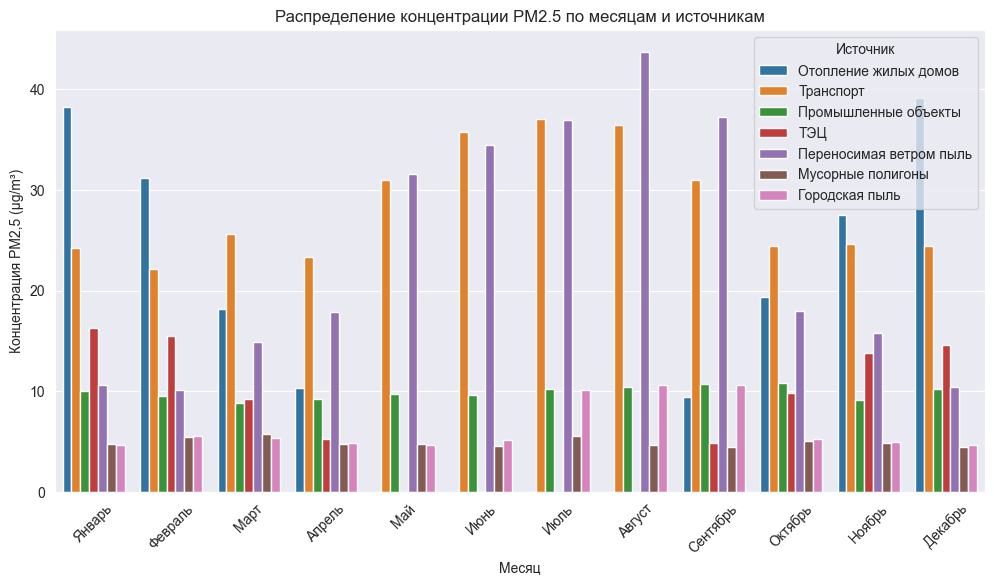

Linear Regression:
R2: 0.96
MAE: 1.65
RMSE: 2.28

Ridge Regression:
Best Params: {'alpha': 100}
R2: 0.96
MAE: 1.64
RMSE: 2.28

Lasso Regression:
Best Params: {'alpha': 1}
R2: 0.96
MAE: 1.61
RMSE: 2.27

Random Forest Regressor:
Best Params: {'max_depth': 5, 'n_estimators': 50}
R2: 0.95
MAE: 1.65
RMSE: 2.58

Сравнение моделей:
LinearRegression: R2=0.96, MAE=1.65, RMSE=2.28
Ridge: R2=0.96, MAE=1.64, RMSE=2.28
Lasso: R2=0.96, MAE=1.61, RMSE=2.27
RandomForest: R2=0.95, MAE=1.65, RMSE=2.58


In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV

# Загружаем данные
file_path = "bishkek_air_pollution_data_extended.csv"  # Укажите путь к расширенному файлу
data = pd.read_csv(file_path)

# Исследуем данные
print(data.info())
print(data.describe())

# Визуализация данных
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Месяц', y='Концентрация PM2,5 (μg/m³)', hue='Источник', ci=None)
plt.title("Распределение концентрации PM2.5 по месяцам и источникам")
plt.xticks(rotation=45)
plt.show()

# Подготовка данных для моделирования
X = data[['Вклад в PM2,5 (%)', 'Температура (°C)', 'Скорость ветра (м/с)', 'Влажность (%)']]
y = data['Концентрация PM2,5 (μg/m³)']

# Разделение на обучающие и тестовые наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Оценка модели
print("Linear Regression:")
print(f"R2: {r2_score(y_test, y_pred_lr):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lr):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lr)):.2f}")

# 2. Ridge Regression
ridge_params = {'alpha': [0.1, 1, 10, 100]}
ridge = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='r2')
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
print("\nRidge Regression:")
print(f"Best Params: {ridge.best_params_}")
print(f"R2: {r2_score(y_test, y_pred_ridge):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_ridge):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_ridge)):.2f}")

# 3. Lasso Regression
lasso_params = {'alpha': [0.01, 0.1, 1, 10]}
lasso = GridSearchCV(Lasso(), lasso_params, cv=5, scoring='r2')
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
print("\nLasso Regression:")
print(f"Best Params: {lasso.best_params_}")
print(f"R2: {r2_score(y_test, y_pred_lasso):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lasso):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lasso)):.2f}")

# 4. Random Forest Regressor
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20]}
rf = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=5, scoring='r2')
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest Regressor:")
print(f"Best Params: {rf.best_params_}")
print(f"R2: {r2_score(y_test, y_pred_rf):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.2f}")

# Сравнение результатов моделей
results = {
    'LinearRegression': {
        'R2': r2_score(y_test, y_pred_lr),
        'MAE': mean_absolute_error(y_test, y_pred_lr),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_lr))
    },
    'Ridge': {
        'R2': r2_score(y_test, y_pred_ridge),
        'MAE': mean_absolute_error(y_test, y_pred_ridge),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_ridge))
    },
    'Lasso': {
        'R2': r2_score(y_test, y_pred_lasso),
        'MAE': mean_absolute_error(y_test, y_pred_lasso),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_lasso))
    },
    'RandomForest': {
        'R2': r2_score(y_test, y_pred_rf),
        'MAE': mean_absolute_error(y_test, y_pred_rf),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_rf))
    }
}

print("\nСравнение моделей:")
for model, metrics in results.items():
    print(f"{model}: R2={metrics['R2']:.2f}, MAE={metrics['MAE']:.2f}, RMSE={metrics['RMSE']:.2f}")


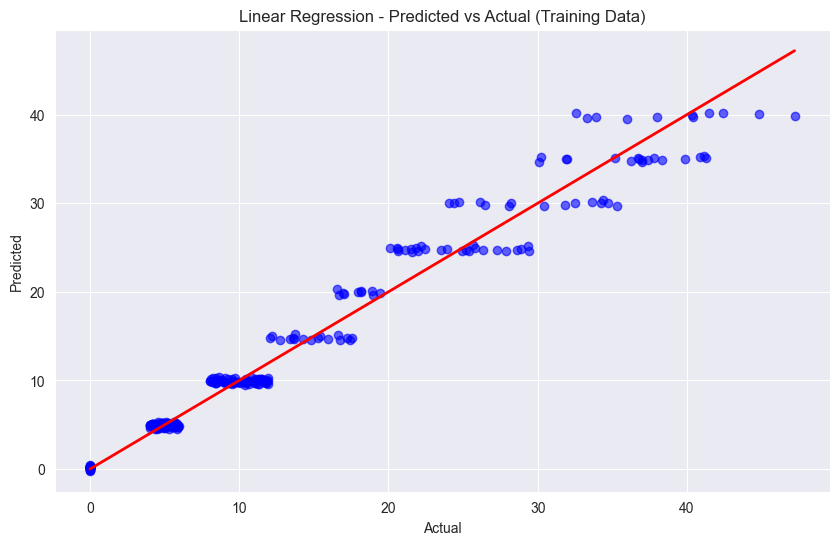

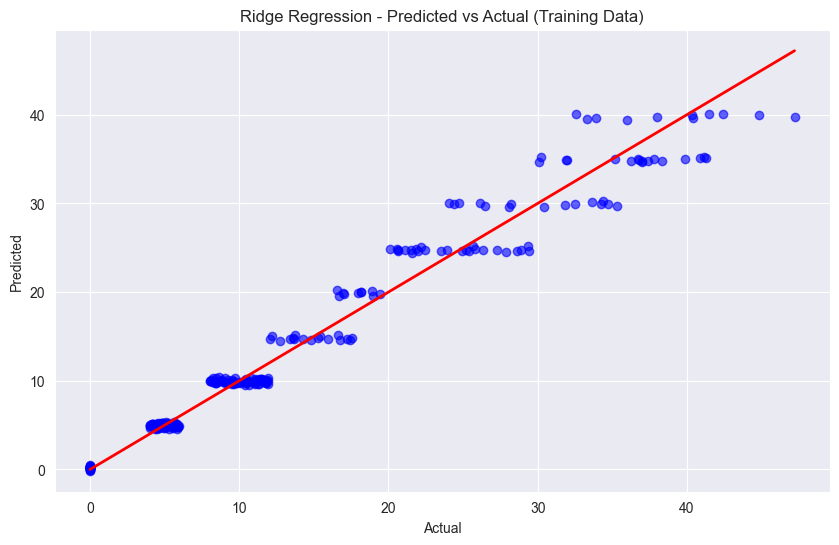

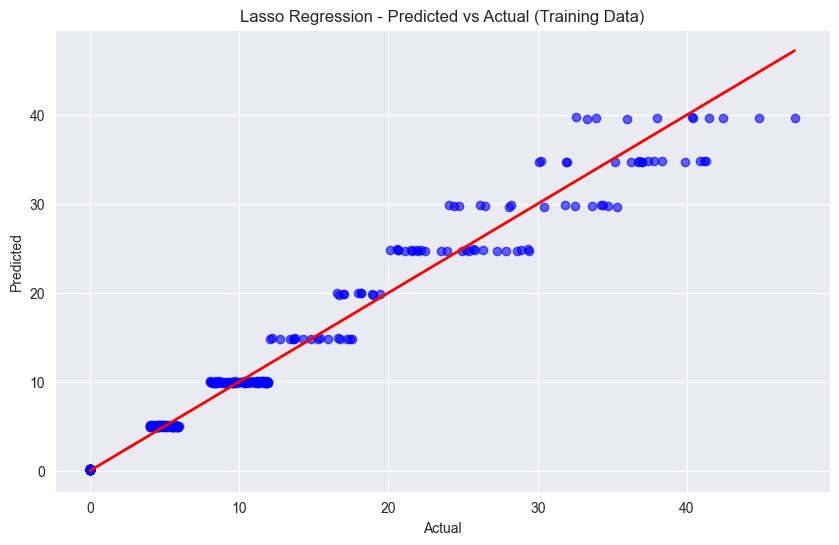

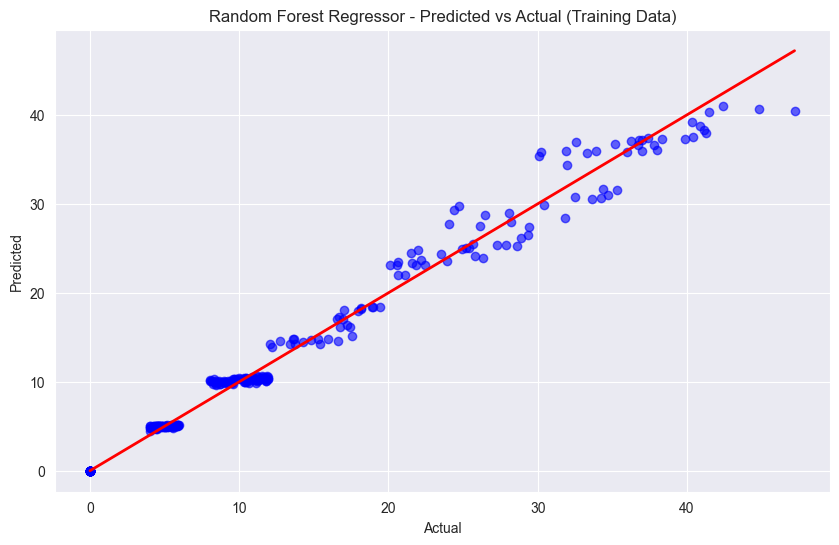

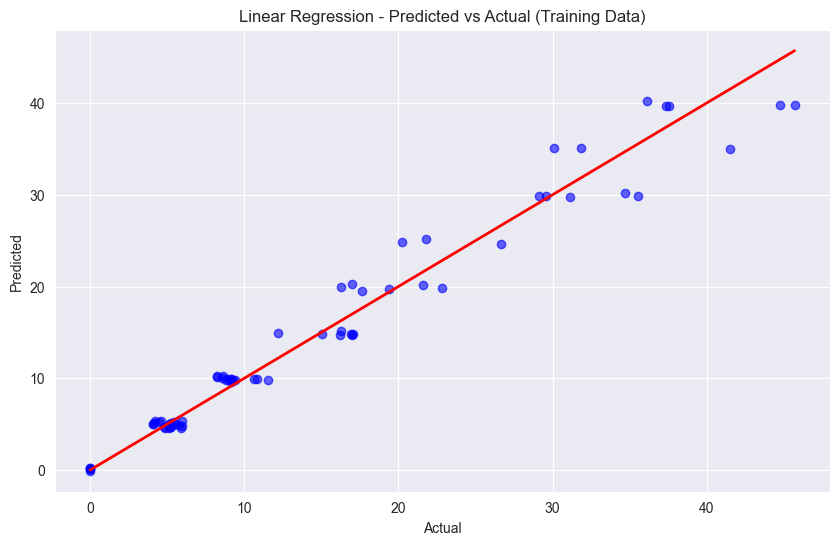

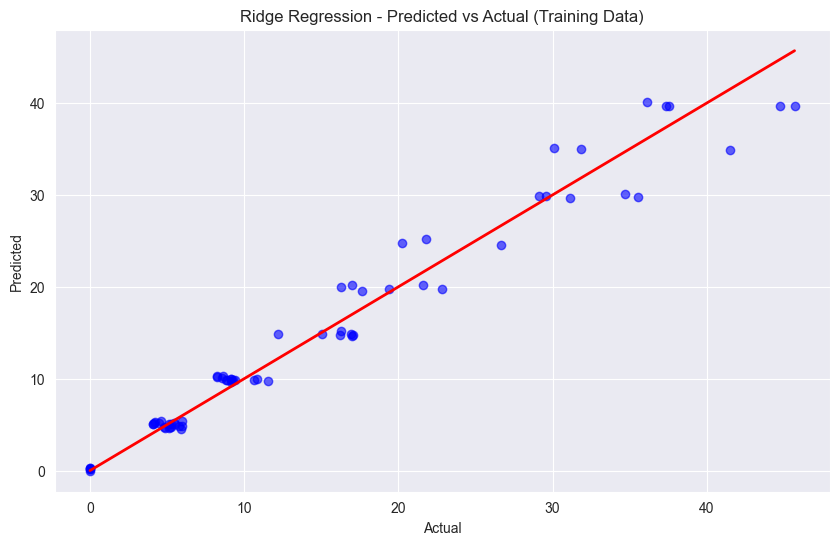

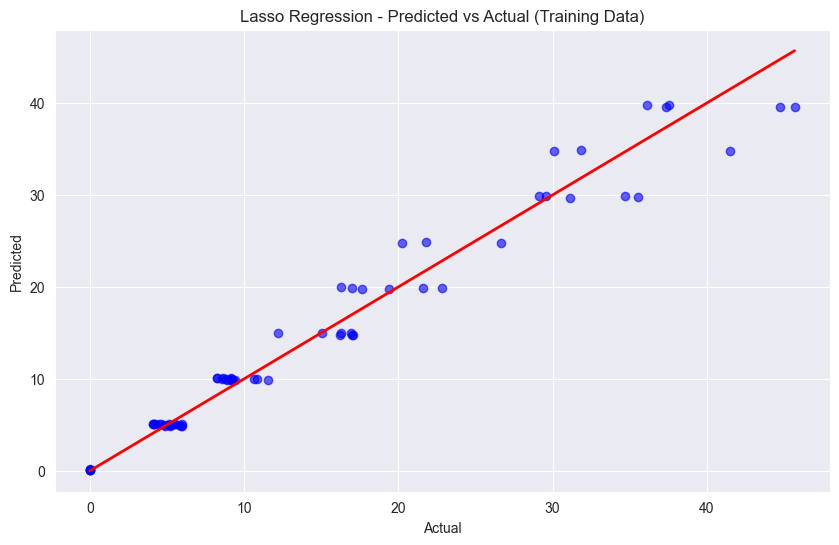

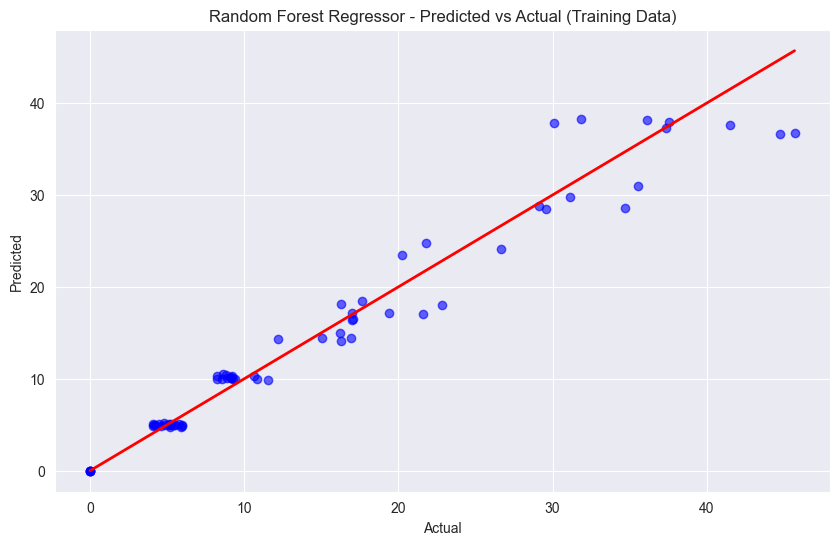


Предсказания для новых данных (Random Forest):
[38.23596956 30.82563141]


In [8]:
# Предсказания на обучающем наборе
y_train_pred_lr = lr.predict(X_train)
y_train_pred_ridge = ridge.predict(X_train)
y_train_pred_lasso = lasso.predict(X_train)
y_train_pred_rf = rf.predict(X_train)

# Сравнение предсказаний на обучающих и тестовых наборах
def plot_predictions(y_true, y_pred, model_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, color='blue', alpha=0.6)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='red', lw=2)
    plt.title(f"{model_name} - Predicted vs Actual (Training Data)")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.show()

# Визуализация для обучающего набора
plot_predictions(y_train, y_train_pred_lr, "Linear Regression")
plot_predictions(y_train, y_train_pred_ridge, "Ridge Regression")
plot_predictions(y_train, y_train_pred_lasso, "Lasso Regression")
plot_predictions(y_train, y_train_pred_rf, "Random Forest Regressor")

# Визуализация для тестового набора
plot_predictions(y_test, y_pred_lr, "Linear Regression")
plot_predictions(y_test, y_pred_ridge, "Ridge Regression")
plot_predictions(y_test, y_pred_lasso, "Lasso Regression")
plot_predictions(y_test, y_pred_rf, "Random Forest Regressor")

# Дополнительная оценка: важность признаков для модели случайного леса
feature_importances = rf.best_estimator_.feature_importances_
features = X.columns


# Пример предсказания на новых данных
new_data = pd.DataFrame({
    'Вклад в PM2,5 (%)': [40, 30],
    'Температура (°C)': [15, 20],
    'Скорость ветра (м/с)': [5, 4],
    'Влажность (%)': [60, 55]
})

new_predictions_rf = rf.predict(new_data)
print("\nПредсказания для новых данных (Random Forest):")
print(new_predictions_rf)


In [9]:
# Функция для оценки точности предсказания
def evaluate_model_accuracy(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    
    print(f"{model_name}:")
    print(f"  R² (коэффициент детерминации): {r2:.2f}")
    print(f"  MAE (средняя абсолютная ошибка): {mae:.2f}")
    print(f"  RMSE (корень из средней квадратичной ошибки): {rmse:.2f}")
    
    # Оценка точности
    if r2 > 0.9:
        print(f"  Точность модели {model_name} очень высокая (R² > 0.9)")
    elif r2 > 0.7:
        print(f"  Точность модели {model_name} хорошая (0.7 < R² ≤ 0.9)")
    elif r2 > 0.5:
        print(f"  Точность модели {model_name} средняя (0.5 < R² ≤ 0.7)")
    else:
        print(f"  Точность модели {model_name} низкая (R² ≤ 0.5)")
    print()

# Оценка для обучающего набора
print("Оценка точности на обучающем наборе данных:")
evaluate_model_accuracy(y_train, y_train_pred_lr, "Linear Regression")
evaluate_model_accuracy(y_train, y_train_pred_ridge, "Ridge Regression")
evaluate_model_accuracy(y_train, y_train_pred_lasso, "Lasso Regression")
evaluate_model_accuracy(y_train, y_train_pred_rf, "Random Forest Regressor")

# Оценка для тестового набора
print("Оценка точности на тестовом наборе данных:")
evaluate_model_accuracy(y_test, y_pred_lr, "Linear Regression")
evaluate_model_accuracy(y_test, y_pred_ridge, "Ridge Regression")
evaluate_model_accuracy(y_test, y_pred_lasso, "Lasso Regression")
evaluate_model_accuracy(y_test, y_pred_rf, "Random Forest Regressor")


Оценка точности на обучающем наборе данных:
Linear Regression:
  R² (коэффициент детерминации): 0.97
  MAE (средняя абсолютная ошибка): 1.46
  RMSE (корень из средней квадратичной ошибки): 2.11
  Точность модели Linear Regression очень высокая (R² > 0.9)

Ridge Regression:
  R² (коэффициент детерминации): 0.97
  MAE (средняя абсолютная ошибка): 1.46
  RMSE (корень из средней квадратичной ошибки): 2.11
  Точность модели Ridge Regression очень высокая (R² > 0.9)

Lasso Regression:
  R² (коэффициент детерминации): 0.97
  MAE (средняя абсолютная ошибка): 1.46
  RMSE (корень из средней квадратичной ошибки): 2.12
  Точность модели Lasso Regression очень высокая (R² > 0.9)

Random Forest Regressor:
  R² (коэффициент детерминации): 0.98
  MAE (средняя абсолютная ошибка): 1.02
  RMSE (корень из средней квадратичной ошибки): 1.51
  Точность модели Random Forest Regressor очень высокая (R² > 0.9)

Оценка точности на тестовом наборе данных:
Linear Regression:
  R² (коэффициент детерминации): 0.96


In [10]:
# Функция для оценки производительности модели
def evaluate_rf_model(X, y, train_size):
    print(f"\n--- Обучение с {int(train_size * 100)}% данных ---")
    
    # Разделение на обучающие и тестовые наборы
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)
    
    # Обучение модели случайного леса
    rf_params = {'n_estimators': [100], 'max_depth': [10]}  # Упрощенные параметры для эксперимента
    rf = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=3, scoring='r2')
    rf.fit(X_train, y_train)
    
    # Предсказание
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    
    # Метрики на обучающем наборе
    print("На обучающем наборе:")
    evaluate_model_accuracy(y_train, y_train_pred, "Random Forest Regressor")
    
    # Метрики на тестовом наборе
    print("На тестовом наборе:")
    evaluate_model_accuracy(y_test, y_test_pred, "Random Forest Regressor")
    
    return rf.best_params_

# Перебор различных размеров обучающего набора
train_sizes = [0.5, 0.7, 0.8, 0.9]
for size in train_sizes:
    evaluate_rf_model(X, y, train_size=size)



--- Обучение с 50% данных ---
На обучающем наборе:
Random Forest Regressor:
  R² (коэффициент детерминации): 0.99
  MAE (средняя абсолютная ошибка): 0.60
  RMSE (корень из средней квадратичной ошибки): 0.99
  Точность модели Random Forest Regressor очень высокая (R² > 0.9)

На тестовом наборе:
Random Forest Regressor:
  R² (коэффициент детерминации): 0.95
  MAE (средняя абсолютная ошибка): 1.58
  RMSE (корень из средней квадратичной ошибки): 2.46
  Точность модели Random Forest Regressor очень высокая (R² > 0.9)


--- Обучение с 70% данных ---
На обучающем наборе:
Random Forest Regressor:
  R² (коэффициент детерминации): 0.99
  MAE (средняя абсолютная ошибка): 0.62
  RMSE (корень из средней квадратичной ошибки): 0.98
  Точность модели Random Forest Regressor очень высокая (R² > 0.9)

На тестовом наборе:
Random Forest Regressor:
  R² (коэффициент детерминации): 0.96
  MAE (средняя абсолютная ошибка): 1.62
  RMSE (корень из средней квадратичной ошибки): 2.51
  Точность модели Random For